In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.spatial.distance import pdist, squareform #scipy spatial distance
import sklearn as sk
import sklearn.metrics.pairwise
import matplotlib.pyplot as plt
import os
import time
from skimage.transform import resize
from sklearn.model_selection import train_test_split


Recurrence Plots

Recurrence plots are a visualization tool for (multivariate) time-series. They are based on exploring the characteristic recurrent behaviour of a time-series. Let q(t)∈Rd
be a multi-variate time-series. It's recurrence plot is defined as

RPi,j=θ(ϵ−||q(i)−q(j)||)

where ϵ is a threshold and θ is the heaviside function.

In [4]:


#modified from https://stackoverflow.com/questions/33650371/recurrence-plot-in-python
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = sk.metrics.pairwise.pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d



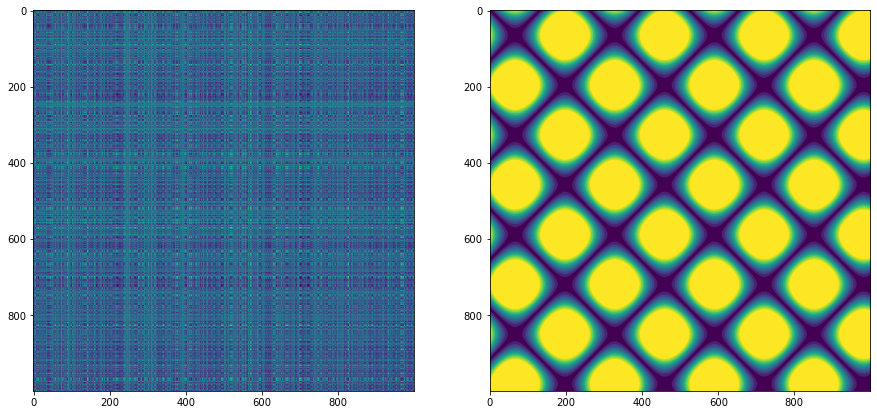

In [5]:
fig = plt.figure(figsize=(15,14))
random_series = np.random.random(1000)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(recurrence_plot(random_series[:,None]))
sinus_series = np.sin(np.linspace(0,24,1000))
ax = fig.add_subplot(1, 2, 2)
ax.imshow(recurrence_plot(sinus_series[:,None]));


Text(0.5, 0, 'Vigilance')

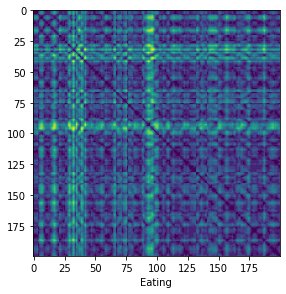

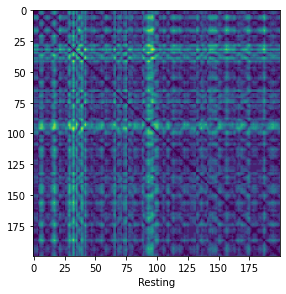

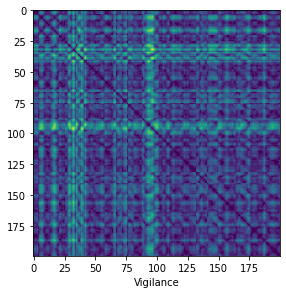

In [35]:
n_steps = 10


data_path_1 = './data/python_1_training/b_1/sheep_58/segment_1'
s01 = pd.read_csv(data_path_1, header = 0).filter(regex = 'acc', axis = 1)
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(recurrence_plot(s01.values,steps=n_steps))
ax.set_xlabel('Eating')




data_path_2 = './data/python_1_training/b_2/sheep_11/segment_1'
s02 = pd.read_csv(data_path_2, header = 0).filter(regex = 'acc', axis = 1)
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(recurrence_plot(s01.values,steps=1000))
ax.set_xlabel('Resting')


data_path_3 = './data/python_1_training/b_3/sheep_5/segment_1'
s03 = pd.read_csv(data_path_3, header = 0).filter(regex = 'acc', axis = 1)
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(recurrence_plot(s01.values,steps=1000))
ax.set_xlabel('Vigilance')



























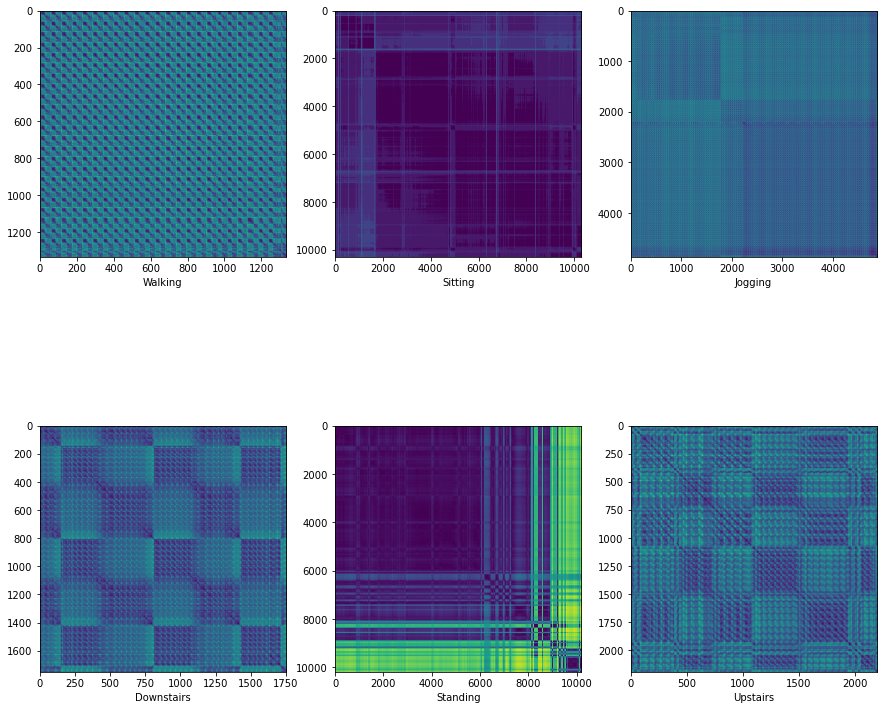

In [7]:

cols = ["attitude.roll","attitude.pitch","attitude.yaw","gravity.x","gravity.y","gravity.z","rotationRate.x","rotationRate.y","rotationRate.z","userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]

fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(recurrence_plot(pd.read_csv("./dataHARtest/A_DeviceMotion_data/wlk_15/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Walking')
ax = fig.add_subplot(2, 3, 2)
ax.imshow(recurrence_plot(pd.read_csv("./dataHARtest/A_DeviceMotion_data/sit_5/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Sitting')
ax = fig.add_subplot(2, 3, 3)
ax.imshow(recurrence_plot(pd.read_csv("./dataHARtest/A_DeviceMotion_data/jog_9/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Jogging')
ax = fig.add_subplot(2, 3, 4)
ax.imshow(recurrence_plot(pd.read_csv("./dataHARtest/A_DeviceMotion_data/dws_1/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Downstairs')
ax = fig.add_subplot(2, 3, 5)
ax.imshow(recurrence_plot(pd.read_csv("./dataHARtest/A_DeviceMotion_data/std_6/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Standing')
ax = fig.add_subplot(2, 3, 6)
ax.imshow(recurrence_plot(pd.read_csv("./dataHARtest/A_DeviceMotion_data/ups_3/sub_1.csv")[cols].values,steps=1000))
ax.set_xlabel('Upstairs');